# **Loan Default Prediction Using Logistic Regression**

- .
- Their innovative approach seeks to harness data science for refining their credit underwriting process.
- The focus here is the Personal Loan segment. A deep dive into the dataset can
reveal patterns in borrower behavior and creditworthiness.
- Analyzing this dataset can provide crucial insights into the financial behaviors, spending habits, and potential risk associated with each borrower.
- The insights gained can optimize loan disbursal, balancing customer outreach
with risk management.

**Buisness Problem:**

Assuming you are a data scientist at this company, you are tasked with analyzing the
dataset to determine the creditworthiness of potential borrowers. Your ultimate objective is to build a logistic regression model, evaluate its performance, and provide actionable insights for the underwriting process.


**Column Profiling:**

1. **loan_amnt:** Amount borrower applied for.
2. **term:** Loan duration (36 or 60 months).
3. **int_rate:** Interest rate on loan.
4. **installment:** Monthly repayment amount.
5. **grade:** Company assigned loan grade 
6. **sub_grade:** Company assigned loan grade 
7. **emp_title:** Borrower's job title.
8. **emp_length:** Duration of borrower's employment (0-10 years).
9. **home_ownership:** Borrower's housing situation (own, rent, etc.).
10. **annual_inc:** Borrower's yearly income.
11. **verification_status:** Whether borrower's income was verified.
12. **issue_d:** Loan issuance month.
13. **loan_status:** Current status of the loan.
14. **purpose:** Borrower's reason for the loan.
15. **title:** The loan's title provided by the borrower.
16. **dti (Debt-to-Income ratio):** Monthly debt vs. monthly income ratio.
17. **earliest_cr_line:** Date of borrower's oldest credit account.
18. **open_acc:** Number of borrower's active credit lines.
19. **pub_rec:** Negative records on borrower's public credit profile.
20. **revol_bal:** Total credit balance.
21. **revol_util:** Usage percentage of 'revolving' accounts like credit cards.
22. **total_acc:** Total number of borrower's credit lines.
23. **initial_list_status:** Loan's first category ('W' or 'F').
24. **application_type:** Individual or joint application.
25. **mort_acc:** Number of borrower's mortgages.
26. **pub_rec_bankruptcies:** Bankruptcy records for borrower.
27. **Address:** Borrower's location.

#**What does 'good' look like?**

##**1. Define Problem Statement and perform Exploratory Data Analysis**

1. **Definition of problem:** Determine the creditworthiness of potential borrowers using various attributes, to ensure that the loans are given to those who are most likely to repay them.
  - Hint: Begin with a clear and concise problem definition. What is the
objective of LCompany? Why is determining loan eligibility crucial?
2. **Observations on Data:** Use functions like data.info(), data.describe(), and data.shape in Python. Identify numeric versus categorical attributes.
 Convert categorical data types using astype('category') if needed.
 - Hint: A thorough understanding of the dataset structure is key. Observe
the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.
3. **Univariate Analysis:** For continuous variables, use histograms or density plots. For categorical variables, use countplots. Tools like Seaborn make these visualizations straightforward. This helps in understanding the distribution of
individual variables.
  - Hint: Begin by understanding individual variables. (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables).
4. **Bivariate Analysis:** Scatter plots for continuous vs. continuous relationships, boxplots for categorical vs. continuous, and crosstab or stacked bar plots for categorical vs. categorical relationships. For example, you can use a box plot to compare the loan amounts between those approved and not approved.
  - Hint: Dive into relationships between two variables.(Relationships
between important variable)
5. **Illustrate the insights based on EDA:** Take notes on surprising
distributions, high correlations, or peculiar behaviors seen in the bivariate analysis.
 - Hint: Every graph and table should deliver an insight.
6. **Comments on range of attributes, outliers of various attributes:** Use box plots and IQR to detect and comment on outliers. Understand the business
context to decide if outliers should be handled or left as they are.
  - Hint: Range and outliers can greatly influence model performance.
7. **Identify normal vs skewed distributions and understand why:** For continuous variables, comment on the skewness. For relationships, comment on positive or negative correlations, clusters, or other patterns noticed.
  - Hint: Identify normal vs skewed distributions and understand why.
8. **Comments for each univariate and bivariate plots:** Each plot should have an accompanying 2-3 line comment or observation. For example, "The majority of loan applicants are in the age range of 30-40. Age vs Loan Amount scatter plot indicates that older individuals generally apply for higher loan amounts."
  - Hint: Just plotting isn't enough, explain them.













**Problem Statement:**

Company aims to refine its credit underwriting process in the Personal Loan segment by leveraging data science. The company is looking to determine the creditworthiness of potential borrowers based on various attributes. The primary objective is to optimize loan disbursal by ensuring that loans are granted to individuals who are most likely to repay them, thereby balancing customer outreach with risk management.

**Determining loan eligibility is crucial for several reasons:**

**Risk Management:** By assessing the creditworthiness of borrowers, Company can mitigate the risk of default and financial loss. Identifying potential risks associated with each borrower helps in making informed decisions about loan approvals.

**Optimizing Loan Disbursal:** Analyzing the dataset allows Company to identify patterns in borrower behavior, spending habits, and other financial behaviors. This insight enables the company to optimize loan disbursal, ensuring loans are granted to individuals with a higher likelihood of repayment.


In [1]:
# Importing all the required libraries
#Data processing
import pandas as pd
import numpy as np

#Data Visualisation
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

#Seting option for full column view of Data
pd.set_option('display.max_columns', None)

#Stats & model building
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (accuracy_score, confusion_matrix,
                             roc_curve, auc, ConfusionMatrixDisplay,
                             f1_score, recall_score,
                             precision_score, precision_recall_curve,
                             average_precision_score, classification_report)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

#Hide warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Downloading the data
!gdown 10E3N6qivz88xzLit9rXuzgjYkKdBZRPt

Downloading...
From: https://drive.google.com/uc?id=10E3N6qivz88xzLit9rXuzgjYkKdBZRPt
To: /content/logistic_regression.csv
100% 100M/100M [00:02<00:00, 46.3MB/s]


In [3]:
df = pd.read_csv('logistic_regression.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [4]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 396030 rows and 27 columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [6]:
# Statistical Summary
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [7]:
df.describe(include = 'object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394274,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48816,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


**Checking Columns Datatype**

In [8]:
# Non-numeric columns
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [9]:
# Number of unique values in all non-numeric columns
for col in cat_cols:
  print(f"No. of unique values in {col}: {df[col].nunique()}")

No. of unique values in term: 2
No. of unique values in grade: 7
No. of unique values in sub_grade: 35
No. of unique values in emp_title: 173105
No. of unique values in emp_length: 11
No. of unique values in home_ownership: 6
No. of unique values in verification_status: 3
No. of unique values in issue_d: 115
No. of unique values in loan_status: 2
No. of unique values in purpose: 14
No. of unique values in title: 48816
No. of unique values in earliest_cr_line: 684
No. of unique values in initial_list_status: 2
No. of unique values in application_type: 3
No. of unique values in address: 393700


In [10]:
# Convert earliest credit line & issue date to datetime
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
df['issue_d'] = pd.to_datetime(df['issue_d'])

In [11]:
#Convert employment length to numeric
d = {'10+ years':10, '4 years':4, '< 1 year':0,
     '6 years':6, '9 years':9,'2 years':2, '3 years':3,
     '8 years':8, '7 years':7, '5 years':5, '1 year':1}
df['emp_length'] = df['emp_length'].replace(d)

In [12]:
#Convert columns with less number of unique values to categorical columns
cat_cols = ['term', 'grade','sub_grade','home_ownership',
            'verification_status','loan_status','purpose',
            'initial_list_status','application_type']

df[cat_cols] = df[cat_cols].astype('category')

In [13]:
num_cols = df.select_dtypes('float64').columns.tolist()
num_cols

['loan_amnt',
 'int_rate',
 'installment',
 'emp_length',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies']

In [14]:
round(df['loan_status'].value_counts(normalize=True)*100,2)

,proportion
loan_status,
Fully Paid,80.39
Charged Off,19.61


In [15]:
round(df['term'].value_counts(normalize=True)*100,2)

,proportion
term,
36 months,76.26
60 months,23.74


In [16]:
round(df['home_ownership'].value_counts(normalize=True)*100,2)

,proportion
home_ownership,
MORTGAGE,50.08
RENT,40.35
OWN,9.53
OTHER,0.03
NONE,0.01
ANY,0.00


In [17]:
round(df['grade'].value_counts(normalize=True)*100,2)

,proportion
grade,
B,29.30
C,26.76
A,16.21
D,16.04
E,7.95
F,2.97
G,0.77


In [18]:
round(df['pub_rec_bankruptcies'].value_counts(normalize=True)*100,2)

,proportion
pub_rec_bankruptcies,
0.0,88.59
1.0,10.82
2.0,0.47
3.0,0.09
4.0,0.02
5.0,0.01
6.0,0.00
7.0,0.00
8.0,0.00


In [19]:
round(df['application_type'].value_counts(normalize=True)*100,2)

,proportion
application_type,
INDIVIDUAL,99.82
JOINT,0.11
DIRECT_PAY,0.07


In [20]:
round(df['purpose'].value_counts(normalize=True)*100,2)

,proportion
purpose,
debt_consolidation,59.21
credit_card,20.96
home_improvement,6.07
other,5.35
major_purchase,2.22
small_business,1.44
car,1.19
medical,1.06
moving,0.72


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             396030 non-null  float64       
 1   term                  396030 non-null  category      
 2   int_rate              396030 non-null  float64       
 3   installment           396030 non-null  float64       
 4   grade                 396030 non-null  category      
 5   sub_grade             396030 non-null  category      
 6   emp_title             373103 non-null  object        
 7   emp_length            377729 non-null  float64       
 8   home_ownership        396030 non-null  category      
 9   annual_inc            396030 non-null  float64       
 10  verification_status   396030 non-null  category      
 11  issue_d               396030 non-null  datetime64[ns]
 12  loan_status           396030 non-null  category      
 13 

**Insights:**

- Almost 75% loans are of 36 months term
- Maximum loans (30%) fall in B grade, followed by C,A & D respectively
- The type of home ownership for 50% cases is mortgage
- The target variable (loan status) is imbalanced in the favour of fully-paid loans. Defaulters are approx 25% of fully paid instances.
- 88% of applicants don't have a public record/haven't filled for bankruptcy
- 99% applicants have applied under 'individual' application type
- 59% of loans are taken for the purpose of debt consolidation followed by 20% on credit card

**Uni-variate analysis**

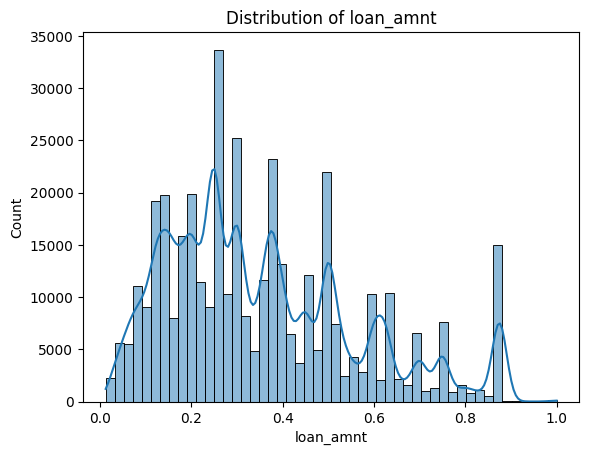

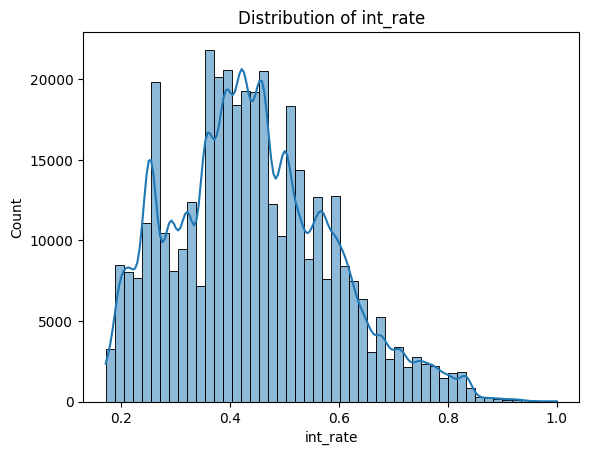

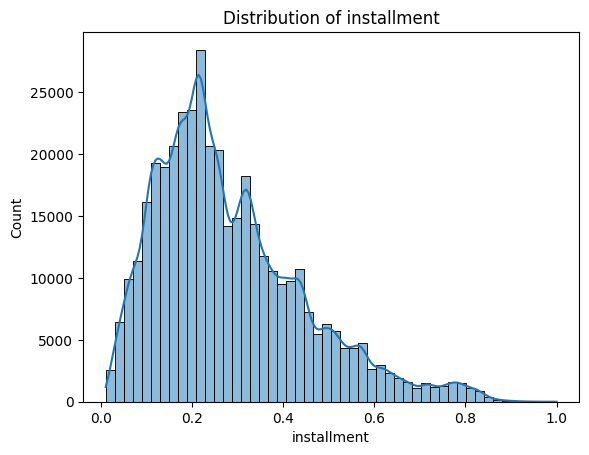

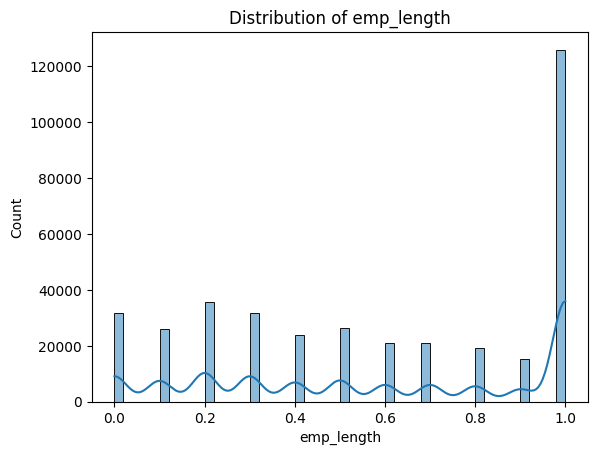

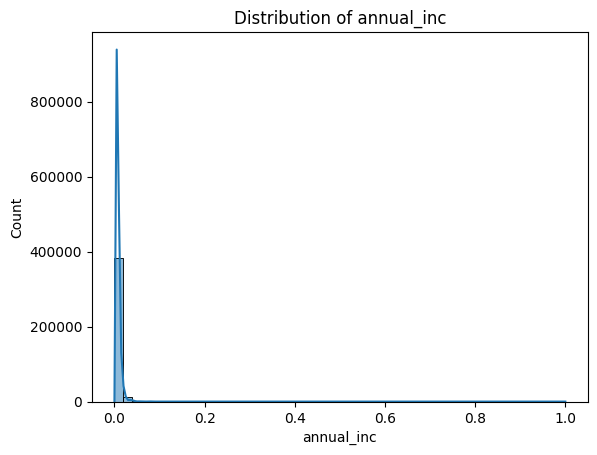

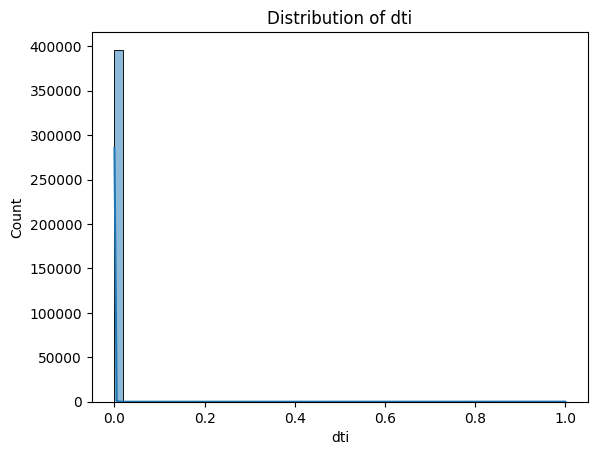

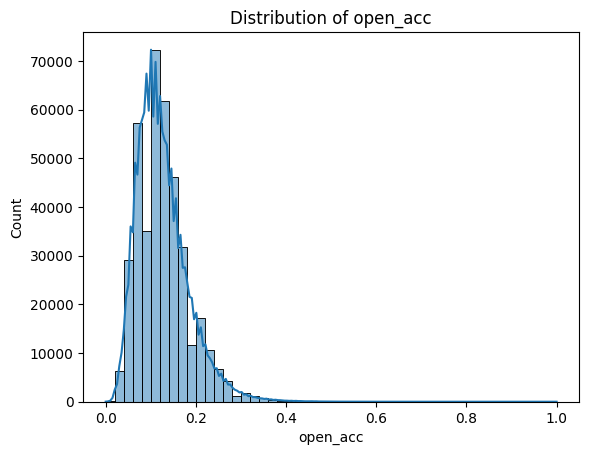

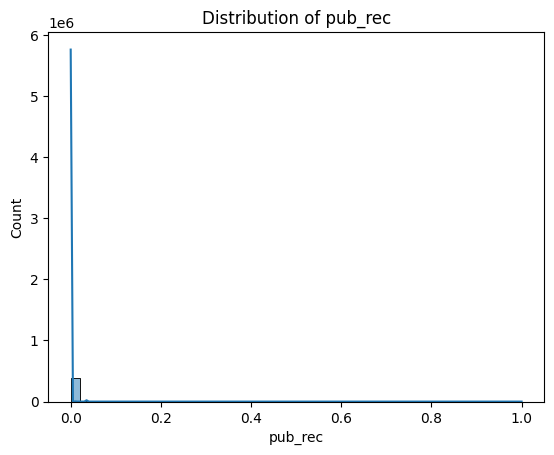

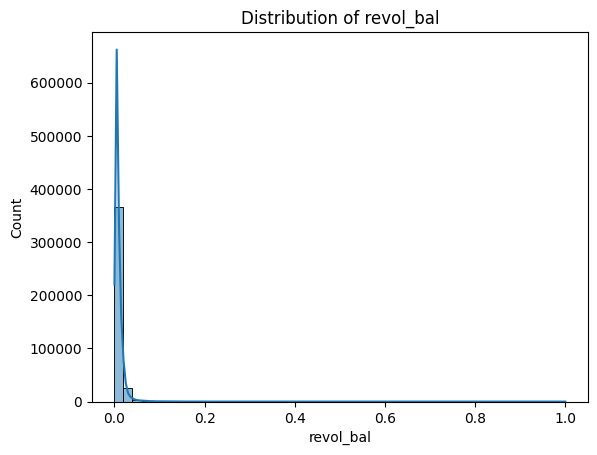

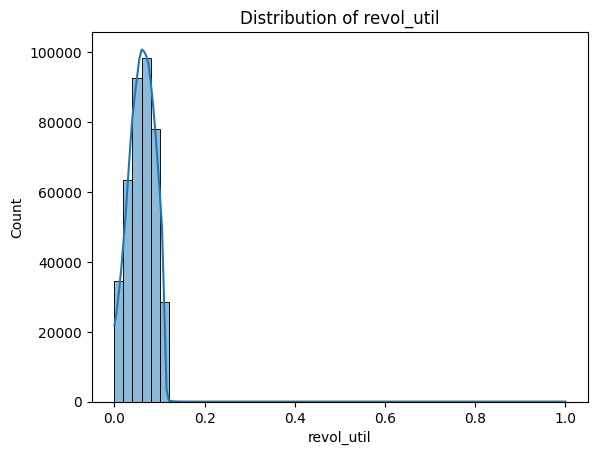

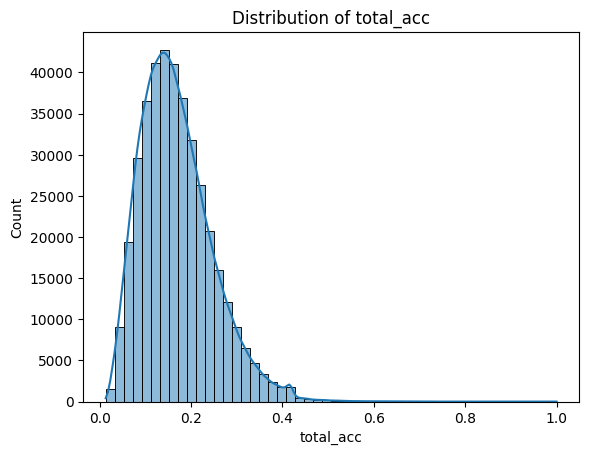

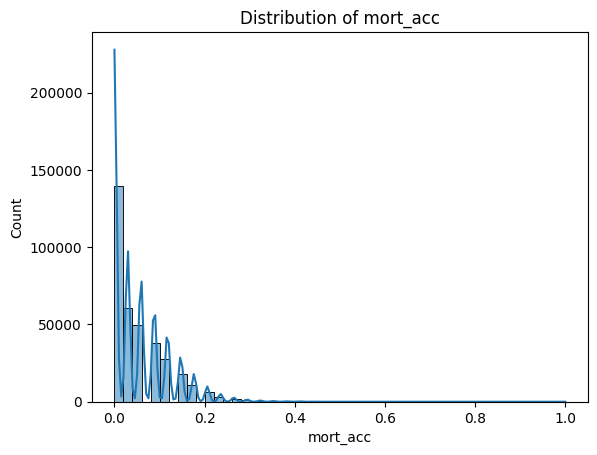

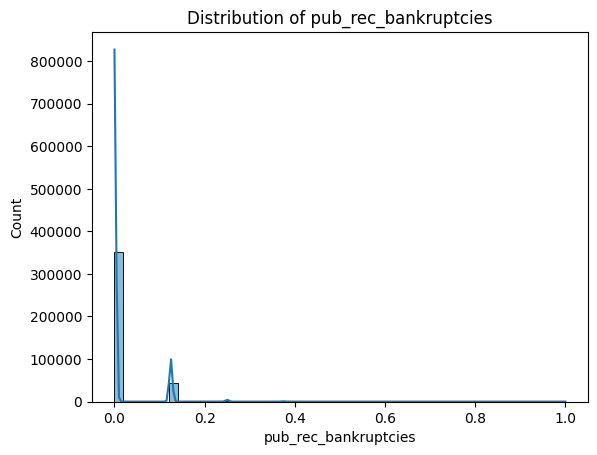

In [22]:
for i in num_cols:
    plt.title("Distribution of {}".format(i))
    sns.histplot(df[i]/df[i].max(), kde=True, bins=50)
    plt.show()

**Insights:**

- Most of the distribution is highly skewed which tells us that they might contain outliers.
- Almost all the continuous features have outliers present in the dataset.

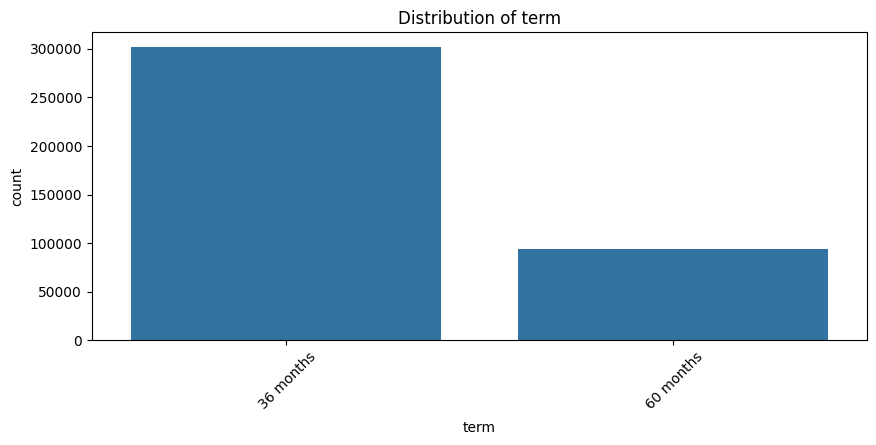

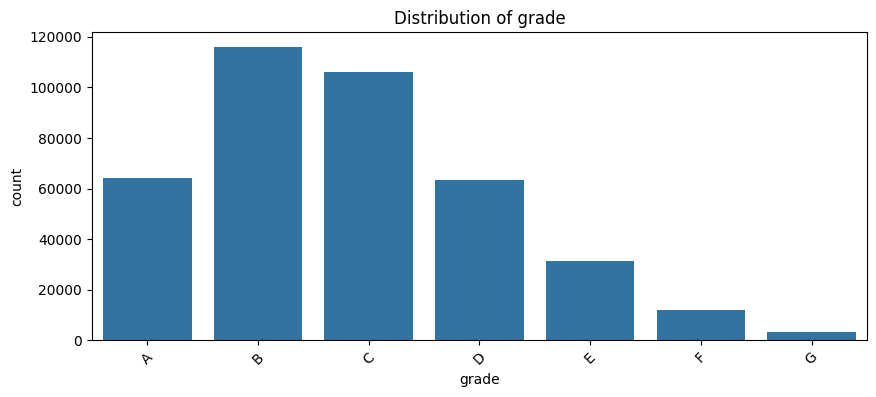

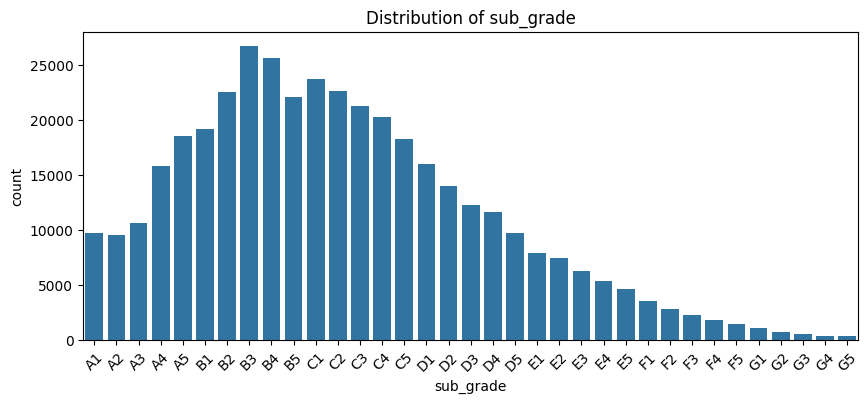

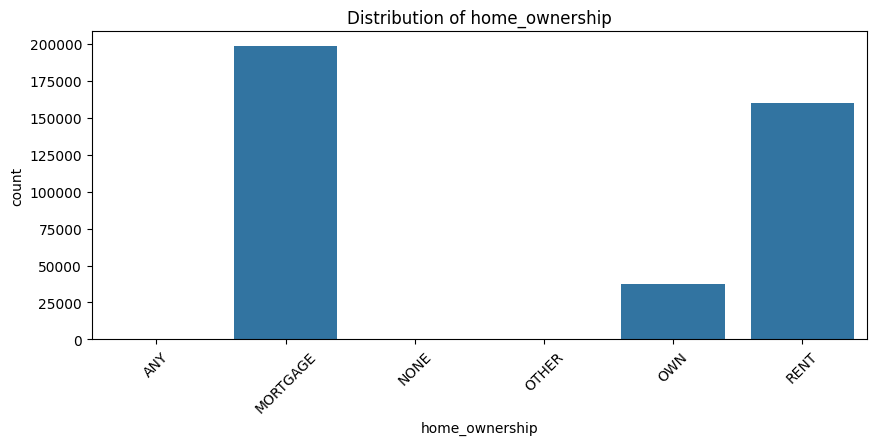

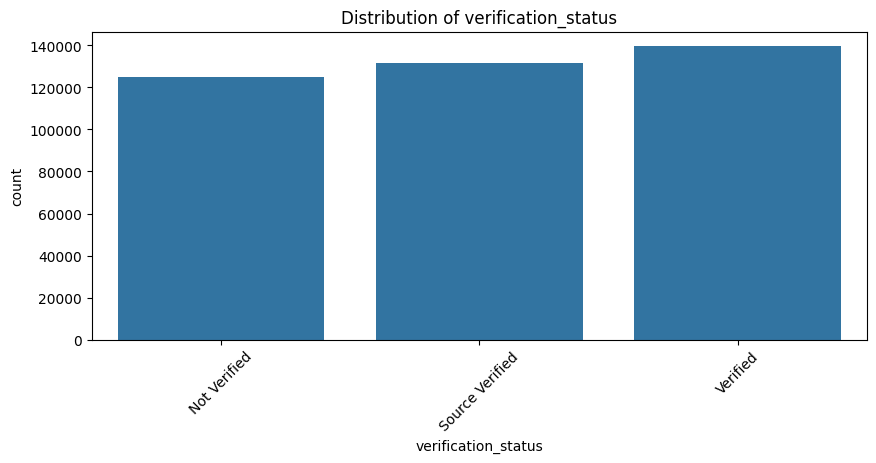

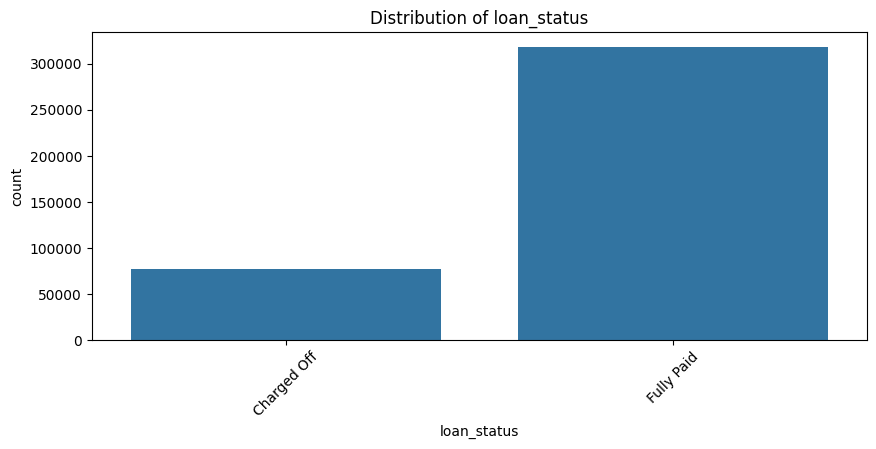

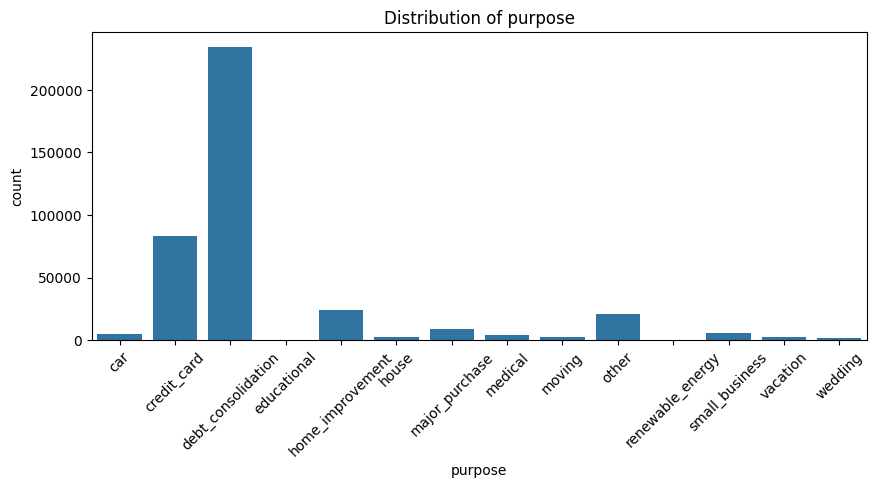

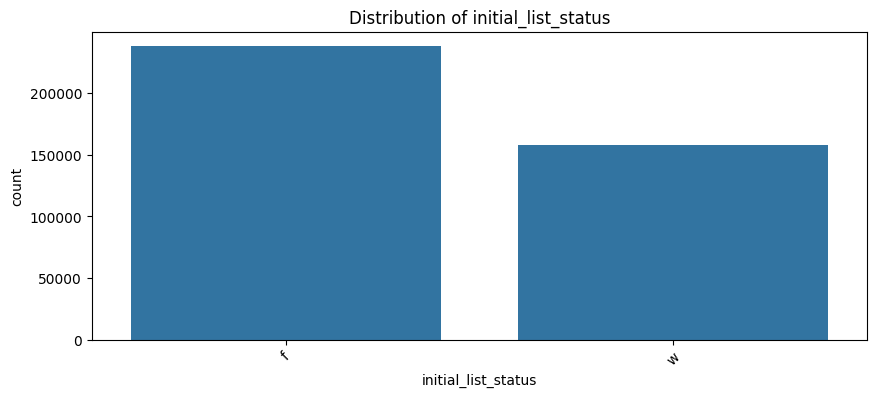

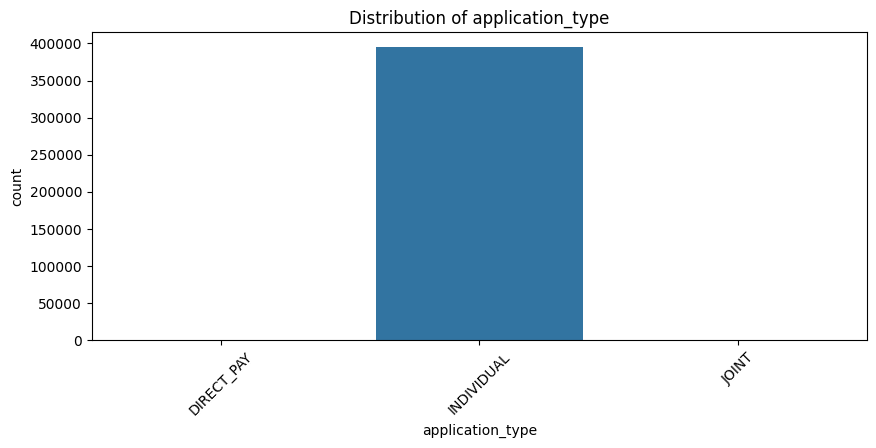

In [23]:
for i in cat_cols:
    plt.figure(figsize=(10, 4))
    plt.title(f'Distribution of {i}')
    sns.countplot(data = df, x=i)
    plt.xticks(rotation = 45)
    plt.show()

**Insights:**

- 99% the application type is Individual
- Most of the loan tenure is disbursed for 36 months
- The grade of majority of people those who have taken the loan is 'B' and have subgrade 'B3'.
- So from that we can infer that people with grade 'B' and subgrade 'B3' are more likely to fully pay the loan.

**Bi-variate Analysis**

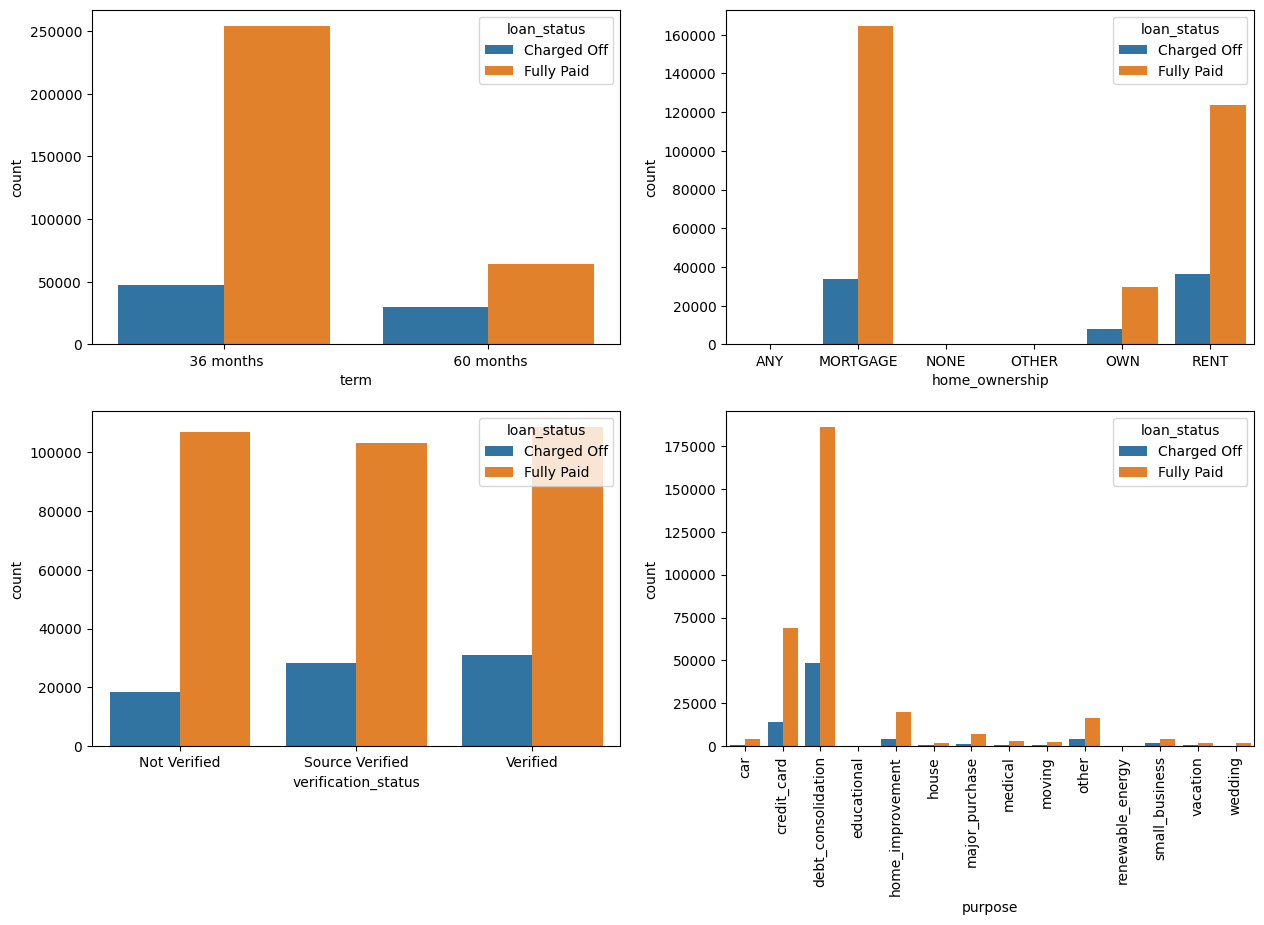

In [24]:
plt.figure(figsize=(15,20))

plt.subplot(4,2,1)
sns.countplot(x='term',data = df,hue='loan_status')

plt.subplot(4,2,2)
sns.countplot(x='home_ownership',data = df,hue='loan_status')

plt.subplot(4,2,3)
sns.countplot(x='verification_status',data = df,hue='loan_status')

plt.subplot(4,2,4)
g=sns.countplot(x='purpose',data = df,hue='loan_status')
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.show()

**Insights:**

- Most of the people took loan for 36 months and full paid on time
- Most of people have home ownership as mortgage and rent
- Most of the people took loan for debt consolidation

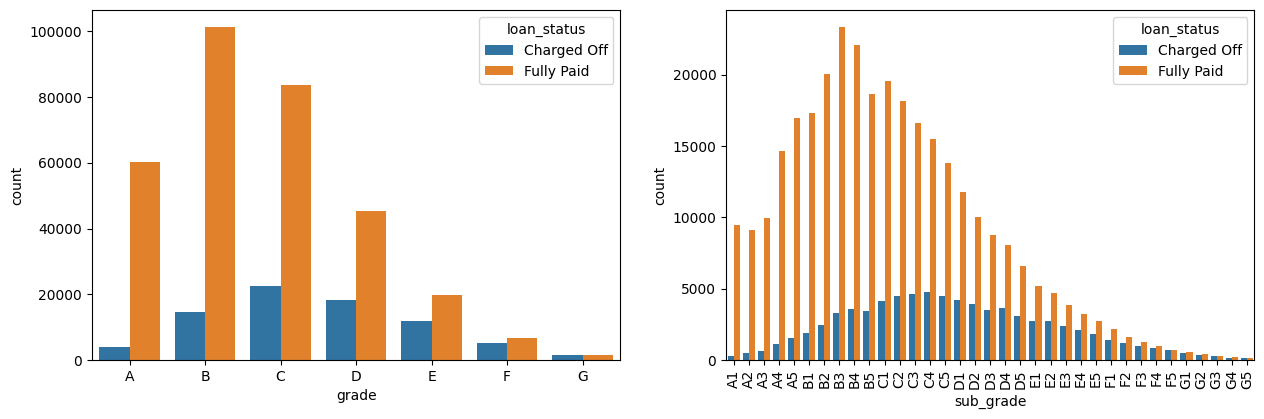

In [25]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x='grade', data= df, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(df.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.show()

**Insights:**

- The grade of majority of people those who have fully paid the loan is 'B' and have subgrade 'B3'.

- So from that we can infer that people with grade 'B' and subgrade 'B3' are more likely to fully pay the loan.

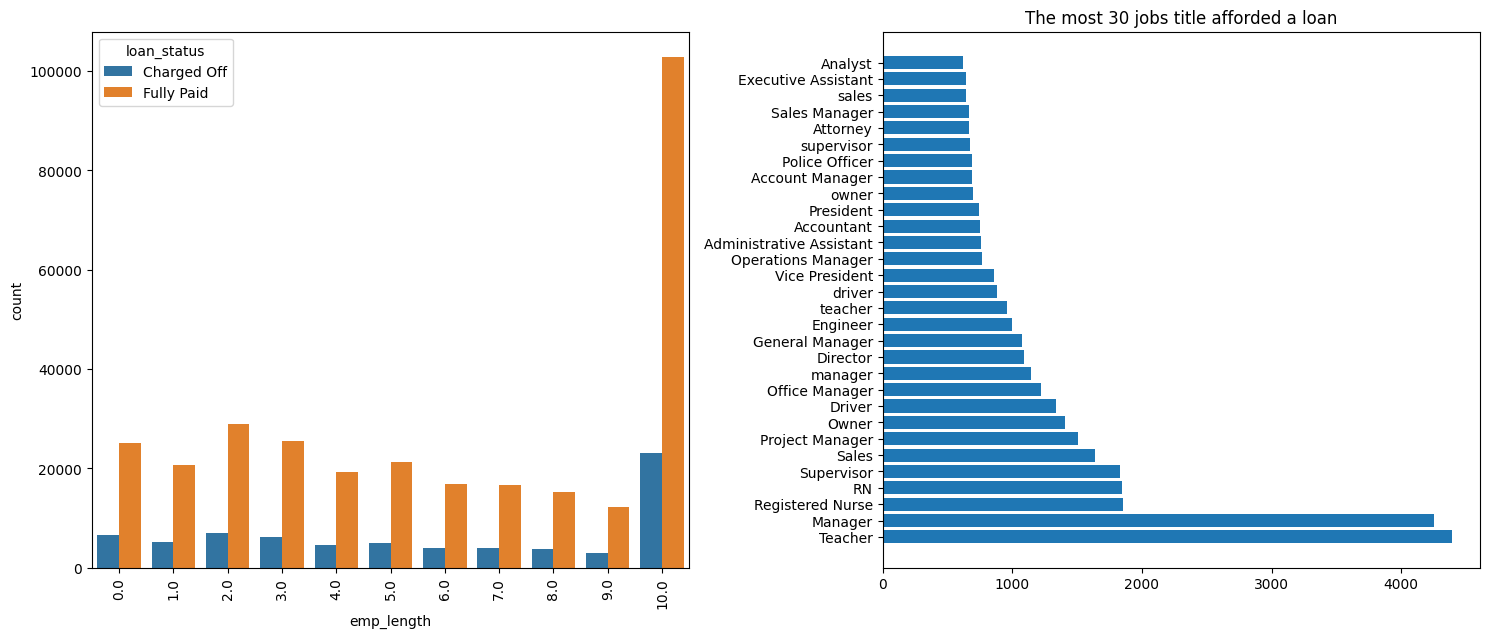

In [26]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
g=sns.countplot(x='emp_length',data = df,hue='loan_status')
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.subplot(2,2,2)
plt.barh(df.emp_title.value_counts()[:30].index,df.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a loan")
plt.tight_layout()

plt.show()

**Insights:**

- Manager and Teacher are the most afforded loan on titles
- Person who employed for more than 10 years has successfully paid of the loan

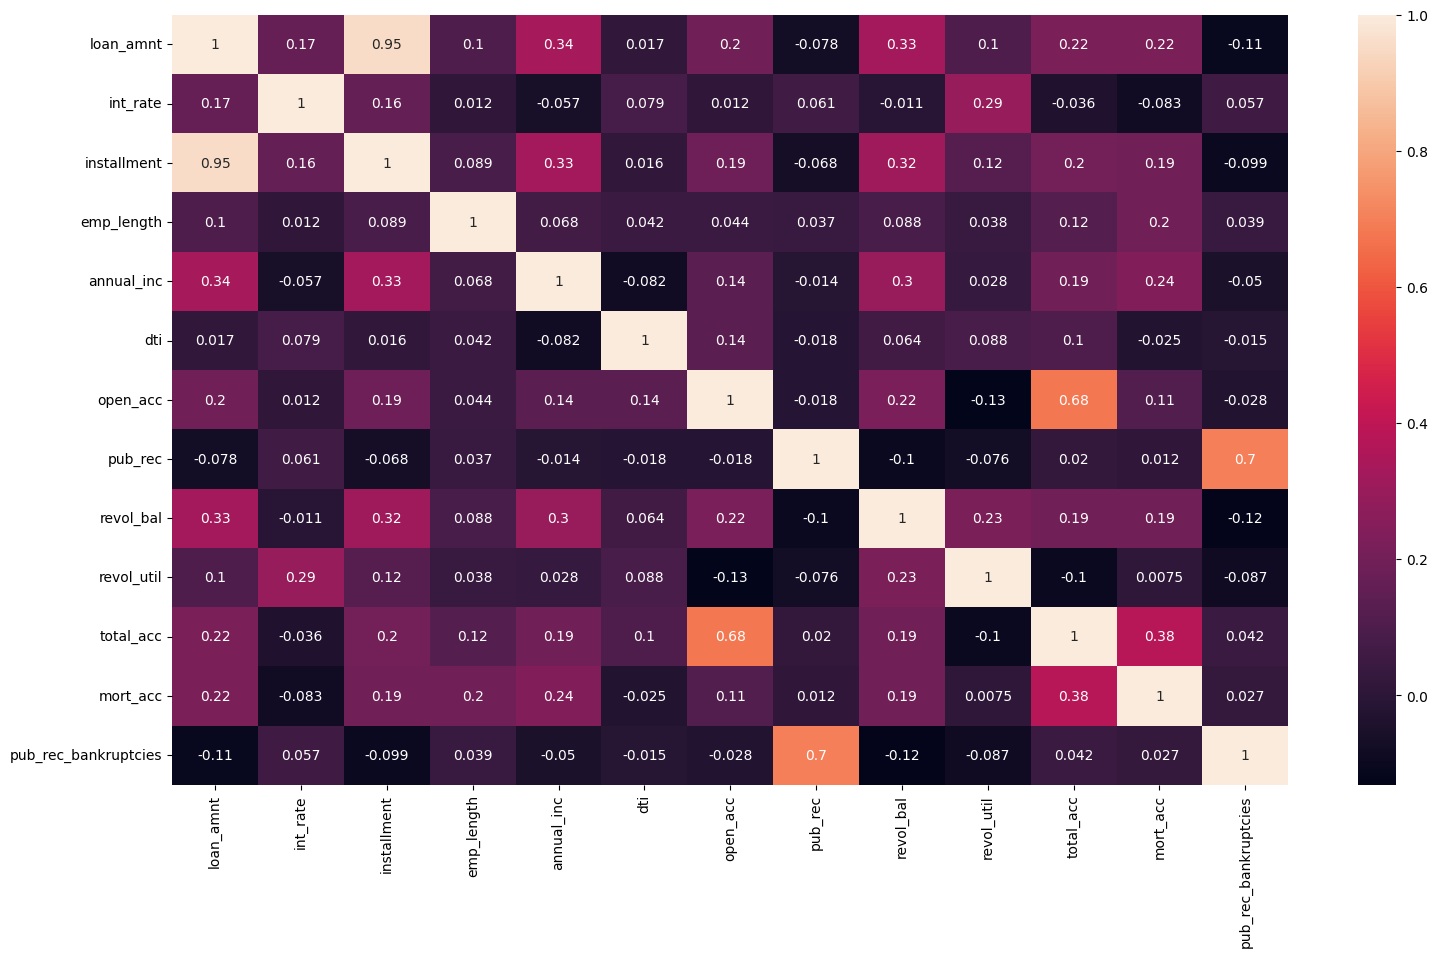

In [27]:
# Co-relation

plt.figure(figsize=(18,10))
sns.heatmap(df.corr(numeric_only=True), annot = True)

plt.show()

**Insights:**

- We noticed almost perfect correlation between "loan_amnt" the "installment" feature.

- installment: The monthly payment owed by the borrower if the loan originates.

- loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.



---



## **2. Data Preprocessing**

1. **Duplicate value check:** Investigate your dataset for any duplicate entries. It might be useful to first examine
duplicates based on a subset of features rather than the entire row, as sometimes complete.
  - Hint: Duplicate rows can skew the results and create redundancy.
2. **Missing value treatment:**

- Identify columns with missing values.
- Decide the best strategy: imputation using central
tendencies, deletion, or more advanced methods depending
on the importance and type of the variable.
- More focus on smartly imputing the data.
  - Hint: Missing values can influence model training.

3. **Outlier treatment:**
- Visualize data for detecting outliers using graphical tools
- Choose an appropriate technique for handling outliers:
capping, transformation, or removal. The choice should be
backed by a logical reason.
  - Hint: Outliers can skew model outcomes.

4. **Feature engineering:**
- Creation of Flags: For attributes like Pub_rec, Mort_acc, and Pub_rec_bankruptcies, consider creating binary flags
based on certain conditions.
- Extracting month and year from date-related variables can
help in capturing time-related patterns.
- Deriving state or region from address fields can narrow down the geographical spread and indicate location-based trends.
- Mapping the emp_length might involve converting textual
employment lengths into numerical values or categories,
making them more useful for modeling.
  - Hint: Crafting new variables or modifying existing ones can enhance the model's predictive power.
5. **Multicollinearity and Feature Selection:**
- VIF (Variance Inflation Factor): Calculate VIF for each
predictor variable. A VIF above a certain threshold (often 5 or 10) might indicate multicollinearity.
- RFE (Recursive Feature Elimination): This technique helps in selecting the most important features by recursively reducing the number of attributes and evaluating the
model performance.
  - Hint: Reducing multicollinearity and choosing relevant features can lead to better model performance.
6. **Data preparation for modeling:**
- Depending on the model's requirements, consider scaling
the features. The choice of scaling technique would vary
based on data distribution and model sensitivity.
- Different encoding techniques are suitable for
different types of categorical variables:
  - Label Encoding: Use for ordinal categories with a natural
  order (e.g., Low, Medium, High).
  - One Hot Encoding: Best for nominal categories without
  inherent order.
  - Target Encoding: Good for high cardinality features.
  Replaces categories with the mean of the target variable for that category. Beware of overfitting; consider
  regularization or smoothing.
  - Hint: Preparing data in a format suitable for modeling is crucial.
7. **Identify normal vs skewed distributions and understand
why:** For continuous variables, comment on the skewness. For
relationships, comment on positive or negative correlations, clusters, or other patterns noticed.
  - Hint: Identify normal vs skewed distributions and understand why.









**Check for Duplicate Values**

In [28]:
df.duplicated().sum()

0

**Insights:**

There are no duplicate instances in the data

**Handling Missing Values**

In [29]:
df.isna().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
annual_inc,0


In [31]:
#Filling missing values with 'Unknown' for object dtype
fill_values = {'title': 'Unknown', 'emp_title': 'Unknown'}
df.fillna(value = fill_values, inplace = True)

In [32]:
#Mean aggregation of mort_acc by total_acc to fill missing values

avg_mort = df.groupby('total_acc')['mort_acc'].mean()

def fill_mort(total_acc, mort_acc):
  if np.isnan(mort_acc):
    return avg_mort[total_acc].round()
  else:
    return mort_acc

In [33]:
df['mort_acc'] = df.apply(lambda x: fill_mort(x['total_acc'],x['mort_acc']), axis=1)

In [34]:
df.dropna(inplace=True)
df.isna().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,0
emp_length,0
home_ownership,0
annual_inc,0


In [35]:
df.shape

(376929, 27)

**Outlier Treatment**

In [36]:
num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies'],
      dtype='object')

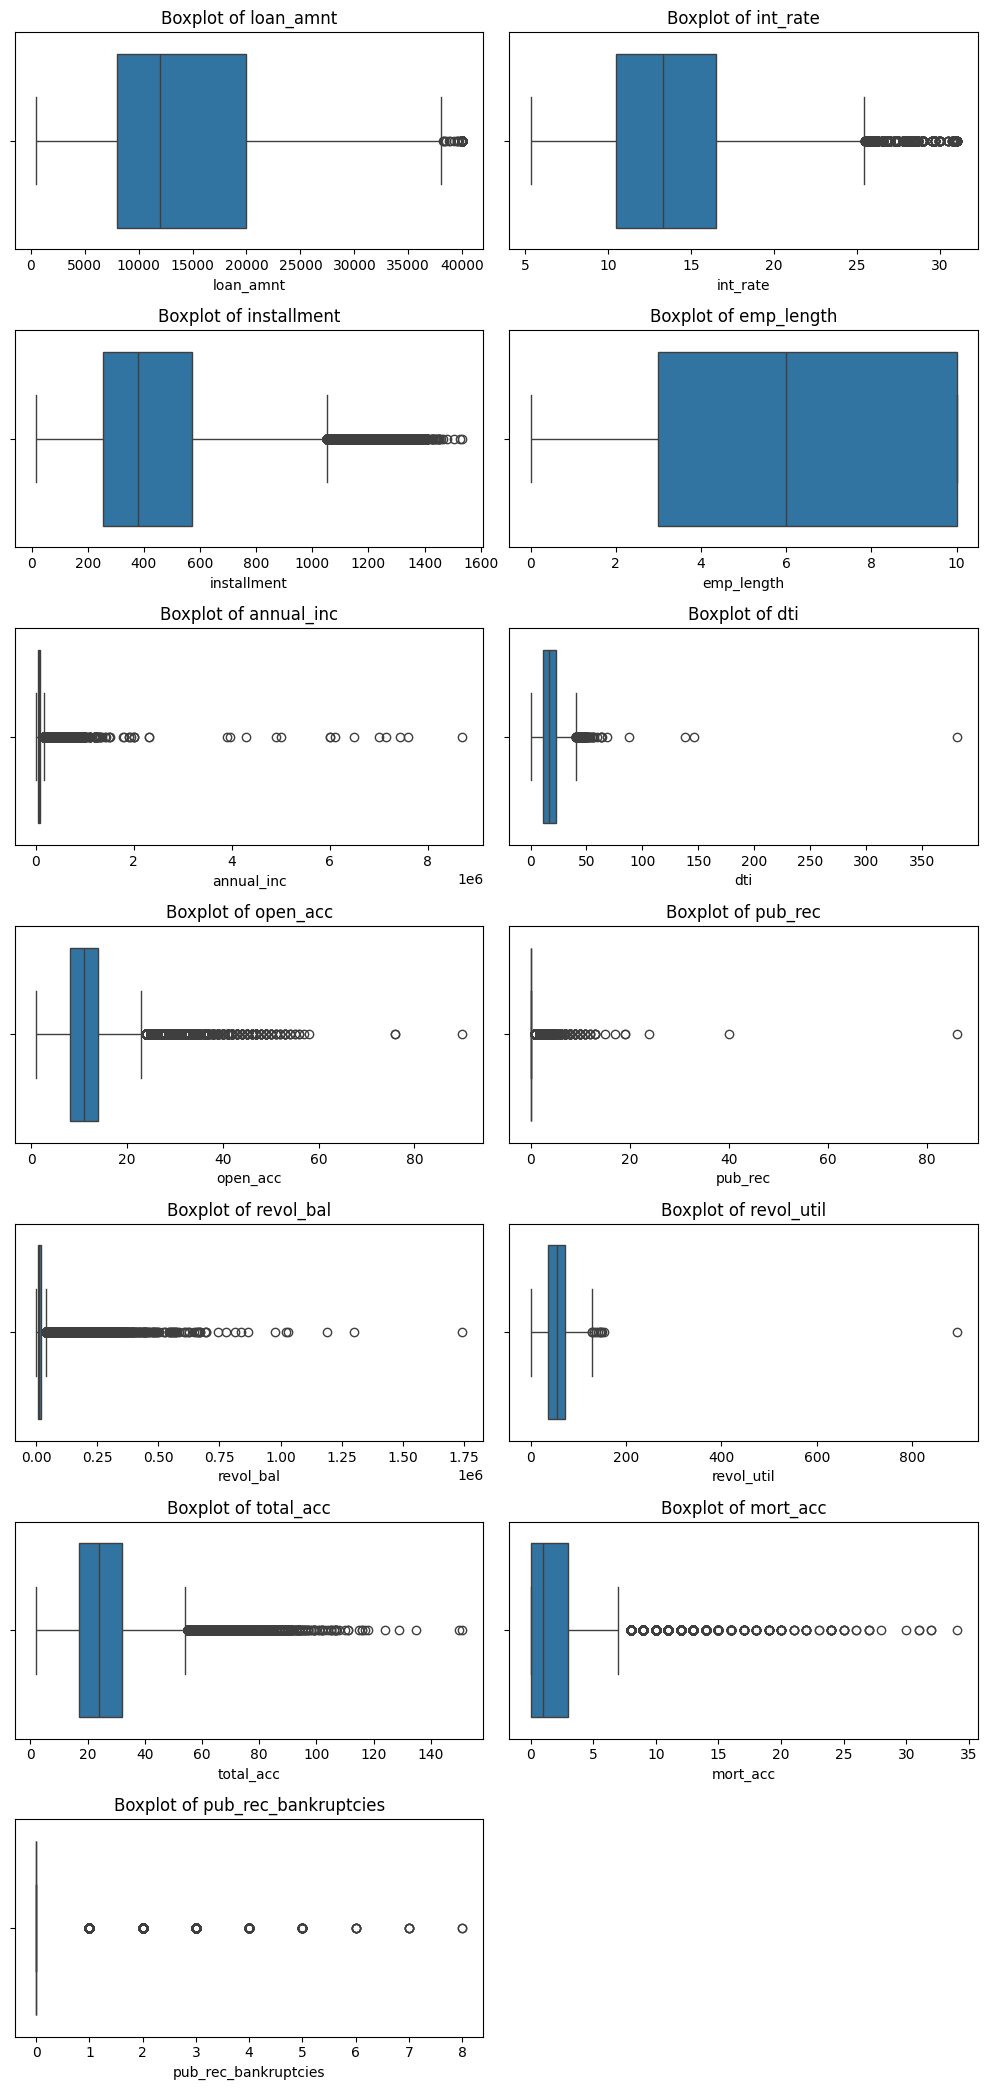

In [37]:
fig = plt.figure(figsize=(10,21))
i=1
for col in num_cols:
  ax = plt.subplot(7,2,i)
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  i += 1

plt.tight_layout()
plt.show()

**Insights:**

Here we can see that many columns have outliers. Lets remove the rows with outliers using standard deviation (99% data is within 3 standard deviations in case of normally distributed data). For pub_Rec and pub_rec_bankruptcies, we can apply the 0 or 1 approach

In [38]:
# Convert pub_rec and pub_rec_bankruptcies to categorical variables

df['pub_rec_bankruptcies'] = np.where(df['pub_rec_bankruptcies'] > 0, 1 , 0)
df['pub_rec'] = np.where(df['pub_rec']>0, 1 , 0)
df[['pub_rec_bankruptcies','pub_rec']] = df[['pub_rec_bankruptcies','pub_rec']].astype('category')

In [39]:
# Numeric columns after converting public records to category
num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc'],
      dtype='object')

In [40]:
#Removing outliers using standard deviation
for col in num_cols:
  mean=df[col].mean()
  std=df[col].std()
  upper = mean + (3*std)
  df = df[~(df[col]>upper)]

In [41]:
df.shape

(350845, 27)

**Feature Engineering**

In [42]:
df['address'].sample(10)

,address
37222,"135 Cortez Ports Suite 676\r\nNorth Matthew, A..."
200783,"52308 Paul Plaza Apt. 453\r\nNew Lindabury, UT..."
273839,"915 Cox Key Apt. 291\r\nJaniceside, MO 30723"
325115,"660 Ross Ridge Suite 446\r\nStanleychester, TX..."
215132,84732 Anthony Harbors Suite 431\r\nPort Justin...
125399,"5900 David Canyon Suite 465\r\nShannontown, KS..."
55677,"0499 Carla Skyway Suite 628\r\nJonesburgh, AL ..."
254675,USS Oconnor\r\nFPO AP 22690
320789,"1735 Humphrey Valleys\r\nEvanston, NV 05113"
388808,"780 Brown Street Suite 999\r\nKelleyland, DE 2..."


In [43]:
# Deriving zip code and state from address
df[['state', 'zip_code']] = df['address'].apply(lambda x: pd.Series([x[-8:-6], x[-5:]]))

In [44]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,state,zip_code
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10.0,RENT,117000.0,Not Verified,2015-01-01,Fully Paid,vacation,Vacation,26.24,1990-06-01,16.0,0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",OK,22690
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4.0,MORTGAGE,65000.0,Not Verified,2015-01-01,Fully Paid,debt_consolidation,Debt consolidation,22.05,2004-07-01,17.0,0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",SD,05113
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,0.0,RENT,43057.0,Source Verified,2015-01-01,Fully Paid,credit_card,Credit card refinancing,12.79,2007-08-01,13.0,0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",WV,05113
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6.0,RENT,54000.0,Not Verified,2014-11-01,Fully Paid,credit_card,Credit card refinancing,2.60,2006-09-01,6.0,0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0,"823 Reid Ford\r\nDelacruzside, MA 00813",MA,00813
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9.0,MORTGAGE,55000.0,Verified,2013-04-01,Charged Off,credit_card,Credit Card Refinance,33.95,1999-03-01,13.0,0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0,"679 Luna Roads\r\nGreggshire, VA 11650",VA,11650


In [45]:
df.zip_code.nunique()

10

**Insights:**

Since there are only 10 zipcodes, we can change the datatype of zipcodes to categorical

In [46]:
df['zip_code'] = df['zip_code'].astype('category')

**Removing columns that do not have an impact on Target Variable**

In [47]:
#Drop installment
df.drop(columns=['installment'], inplace=True)

#Drop address
df.drop(["address"], axis = 1, inplace=True)

In [48]:
# Remove columns which do not have an impact on loan_status
df.drop(columns=['initial_list_status','state',
                 'emp_title', 'title','earliest_cr_line',
                 'issue_d','sub_grade'], inplace=True)

# Subgrade is removed because grade and subgrade are similar features

**Data Pre-Processing**

In [49]:
# Encoding Target Variable

df['loan_status']=df['loan_status'].map({'Fully Paid': 0, 'Charged Off':1}).astype(int)

In [54]:
x = df.drop(columns=['loan_status'])
x.reset_index(inplace=True, drop=True)
y = df['loan_status']
y.reset_index(drop=True, inplace=True)

In [55]:
# Encoding Binary features into numerical dtype

x['term'] = x['term'].map({' 36 months': 36, ' 60 months':60}).astype(int)

**One Hot Encoding of Categorical Features**

In [56]:
cat_cols = x.select_dtypes('category').columns

encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(x[cat_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cat_cols))
x = pd.concat([x,encoded_df], axis=1)
x.drop(columns=cat_cols, inplace=True)
x.head()

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,mort_acc,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,pub_rec_0,pub_rec_1,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT,pub_rec_bankruptcies_0,pub_rec_bankruptcies_1,zip_code_00813,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
0,10000.0,36,11.44,10.0,117000.0,26.24,16.0,36369.0,41.8,25.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8000.0,36,11.99,4.0,65000.0,22.05,17.0,20131.0,53.3,27.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15600.0,36,10.49,0.0,43057.0,12.79,13.0,11987.0,92.2,26.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7200.0,36,6.49,6.0,54000.0,2.60,6.0,5472.0,21.5,13.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24375.0,60,17.27,9.0,55000.0,33.95,13.0,24584.0,69.8,43.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Data Preparation for Modelling**

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,stratify=y,random_state=42)

In [58]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((280676, 58), (280676,), (70169, 58), (70169,))

**Scaling Numeric Features**

In [59]:
scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

In [60]:
x_train.tail()

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,mort_acc,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,pub_rec_0,pub_rec_1,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT,pub_rec_bankruptcies_0,pub_rec_bankruptcies_1,zip_code_00813,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
280671,0.167959,0.0,0.141671,0.7,0.194444,0.255954,0.60,0.104275,0.271695,0.578947,0.428571,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
280672,0.497416,0.0,0.445778,0.4,0.182540,0.414482,0.24,0.224536,0.670722,0.263158,0.285714,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
280673,0.064599,0.0,0.686664,0.7,0.238095,0.220111,0.32,0.249454,0.622871,0.385965,0.428571,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
280674,0.245478,1.0,0.177665,0.9,0.313492,0.134953,0.92,0.080701,0.039740,0.842105,0.428571,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
280675,0.646641,1.0,0.885095,0.6,0.349206,0.747173,0.88,0.213775,0.543390,0.596491,0.714286,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Oversampling with SMOTE**

In [61]:
# Oversampling to balance the target variable

sm=SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train,y_train.ravel())

print(f"Before OverSampling, count of label 1: {sum(y_train == 1)}")
print(f"Before OverSampling, count of label 0: {sum(y_train == 0)}")
print(f"After OverSampling, count of label 1: {sum(y_train_res == 1)}")
print(f"After OverSampling, count of label 0: {sum(y_train_res == 0)}")

Before OverSampling, count of label 1: 54200
Before OverSampling, count of label 0: 226476
After OverSampling, count of label 1: 226476
After OverSampling, count of label 0: 226476




---



## **3. Model building**

1. **Build the Logistic Regression mode:** Prepare the data for training
and validation, initiate the logistic regression algorithm, and fit the model on the training data.
  - Hint: Logistic Regression is suitable for binary classification problems.
2. **Hyperparameter Tuning:**
- Use techniques like GridSearchCV or RandomizedSearchCV to perform hyperparameter tuning.
- Define the grid of hyperparameters. For Logistic Regression, parameters like
regularization strength (C), penalty (l1 or l2) can be tuned.
  - Hyperparameters are the parameters of the model that are not learned
automatically and need to be set manually or iteratively. Tuning them can
enhance the model's performance.
3. **Handling Class Imbalance:**
- Exploratory Data Analysis(EDA): During EDA, check the distribution of the target variable. If one class heavily outnumbers the other, consider it an imbalance.
- Resampling Techniques Oversampling: Increase the number of instances in the
minority class by replicating data or generating synthetic samples. Libraries like SMOTE (Synthetic Minority Over-sampling Technique) can be beneficial.
- Algorithmic Approach: Use algorithms that allow setting class weights, making the model pay more attention to the minority class. In LogisticRegression from sklearn, you can set the class_weight parameter to 'balanced'.
  - Hint: In many real-world datasets, especially in cases like fraud detection
or loan default prediction, the number of instances of one class can heavily
outnumber the other, leading to a model that performs poorly on the minority class.
4. **Display model coefficients with column names:** Once the model is trained with the best hyperparameters, extract coefficients and map them against predictor names to understand the weight/importance of each feature.
  - Hint: Coefficients provide insight into the importance and relationship of predictors with the outcome.







Train Accuracy : 0.8
Train F1 Score: 0.61
Train Recall Score: 0.81
Train Precision Score: 0.49

Test Accuracy : 0.8
Test F1 Score: 0.61
Test Recall Score: 0.81
Test Precision Score: 0.49


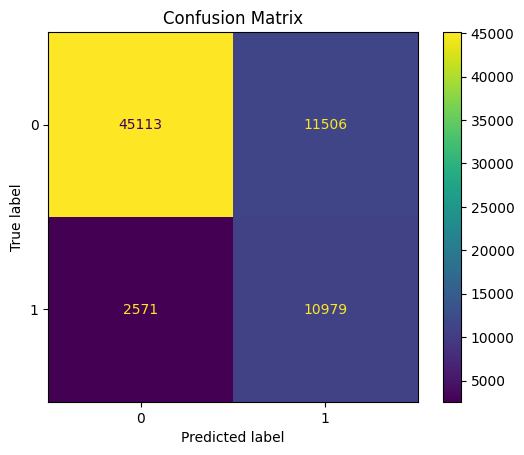

In [62]:
model = LogisticRegression()
model.fit(x_train_res, y_train_res)
train_preds = model.predict(x_train)
test_preds = model.predict(x_test)

#Model Evaluation
print('Train Accuracy :', model.score(x_train, y_train).round(2))
print('Train F1 Score:',f1_score(y_train,train_preds).round(2))
print('Train Recall Score:',recall_score(y_train,train_preds).round(2))
print('Train Precision Score:',precision_score(y_train,train_preds).round(2))

print('\nTest Accuracy :',model.score(x_test,y_test).round(2))
print('Test F1 Score:',f1_score(y_test,test_preds).round(2))
print('Test Recall Score:',recall_score(y_test,test_preds).round(2))
print('Test Precision Score:',precision_score(y_test,test_preds).round(2))

# Confusion Matrix
cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

**Classification Report**

In [63]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87     56619
           1       0.49      0.81      0.61     13550

    accuracy                           0.80     70169
   macro avg       0.72      0.80      0.74     70169
weighted avg       0.86      0.80      0.82     70169



**Insights:**
- It can be observed that the recall score is very high (our model is able to identify 80% of actual defaulters) but the precision is low for positive class (of all the predicted defaulters, only 50% are actually defaulters).
- Although this model is effective in reducing NPAs by flagging most of the defaulters, it may cause loantap to deny loans to many deserving customers due to low precision (false positives)
- Low precision has also caused F1 score to drop to 60% even though accuracy is 80%

**Feature Importance**

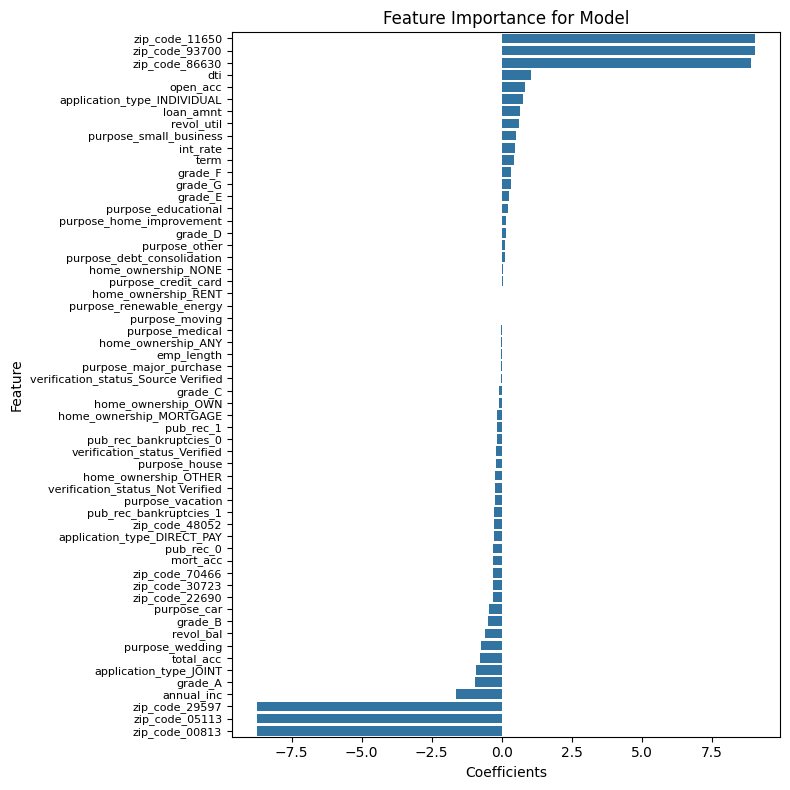

In [64]:
feature_imp = pd.DataFrame({'Columns':x_train.columns, 'Coefficients':model.coef_[0]}).round(2).sort_values('Coefficients', ascending=False)

plt.figure(figsize=(8,8))
sns.barplot(y = feature_imp['Columns'],
           x =  feature_imp['Coefficients'])
plt.title("Feature Importance for Model")
plt.yticks(fontsize=8)
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

**Insights:**
The model has assigned large weightage to zip_code features followed by dti, open_acc, loan_amnt
Similarly, large negative coefficients are assigned to a few zip codes, followed by annual income and joint application type



---



## **4. Results Interpretation & Stakeholder Presentation**

1. **Understand the Business Context:**Familiarize yourself with the
business objectives, challenges, and KPIs. This will enable you to frame your
findings in the context that resonates with business stakeholders.
  - Hint: Your model is only as good as the actionable insights it can provide.

2. **Interpreting Model Coefficients:** Review the coefficients from
the logistic regression. Higher absolute values indicate greater importance. Consider the sign (+/-) to understand the direction of the relationship.
  - Hint: Knowing which features significantly affect the target variable can provide actionable insights.

3. **Visual Representations:** Utilize well-labeled charts, plots, and graphs (like ROC AUC curve and Precision recall curve) to visualize and emphasize key insights.
  - Hint: Visuals can often convey information more effectively than numbers alone.

4. **Trade-off Analysis:** Highlight the implications of false positives and false negatives. Discuss strategies to strike a balance, such as adjusting the classification threshold.
  - Hint: Business decisions often involve trade-offs. It's crucial to understand the balance between risk (false positives) and opportunity (financing more individuals).

5. **Recommendations:** Recommend strategies to improve loan approval processes, mitigate risks, or capitalize on opportunities. Support these
recommendations with evidence from your analysis.
  - Hint: End with actionable recommendations derived from your analysis.

6. **Feedback Loop:** Propose methods for continuously monitoring the model's performance over time and iterating based on new data or changing business needs.
  - Hint: Continuous improvement is key in analytics.







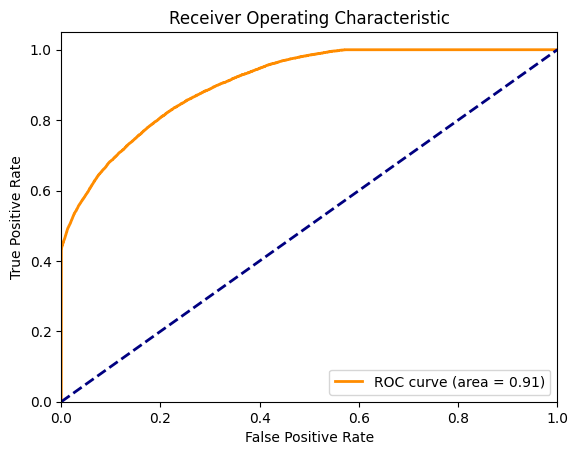

In [65]:
# Predict probabilities for the test set
probs = model.predict_proba(x_test)[:,1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Insights:**
- AUC of 0.91 signifies that the model is able to discriminate well between the positive and the negative class.
- But it is not a good measure for an imbalanced target variable because it may be high even when the classifier has a poor score on the minority class.
- This can happen when the classifier performs well on the majority class instances, which dominate the dataset. As a result, the AUC may appear high, but the model may not effectively identify the minority class instances.
- Lets plot the Precision-Recall curve which is more suited for evaluation of imbalanced data

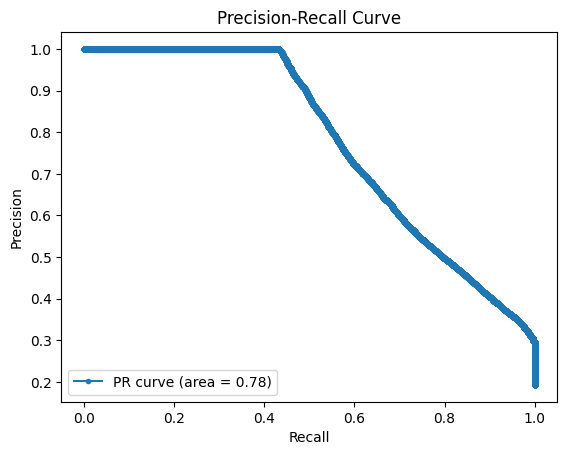

In [66]:
# Compute the false precision and recall at all thresholds
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# Area under Precision Recall Curve
auprc = average_precision_score(y_test, probs)

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.', label='PR curve (area = %0.2f)' % auprc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

**Insights:**

As expected, the area under precision recall curve is not as high. It is a decent model as the area is more than 0.5 (random model benchmark) but there is still scope for improvement

**Conclusion:**
1. How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.

  Ans: Precision score is an indicator of type1 error. Increasing precision score of the model will minimise false positives and ensure that the company is not losing out on the opportunity to finance worthy individuals.

2. Since NPA (non-performing asset) is a real problem in this industry, it's important we play safe and shouldn't disburse loans to anyone.

  Ans: Recall score is an indicator of how many actual defaulters are flagged by the model. By increasing the recall score, we can minimise false negatives (type2 error) and ensure that loans are not disbursed to defaulters.

**Insights:**

1. Impact of Categorical Attributes on loan_status (target variable):
  - The % of defaulters is much higher for longer (60-month) term.
  - As expected, grade/sub-grade has the maximum impact on loan_status with highest grade having maximum defaulters.
  - Zip codes such as 11650, 86630 and 93700 have 100% defaulters.
  - We can remove initial_list_status and state as they have no impact on loan_status.
  - Direct pay application type has higher default rate compared to individual/joint.
  - Loan taken for the purpose of small business has the highest rate of default.

2. Impact of Numerical Attributes on loan_status (target variable):
  - It can be observed that the mean loan_amnt, int_rate, dti, open_acc and revol_util are higher for defaulters.
  - The mean annual income is lower for defaulters.

3. A Logistic Regression model (trained after upsampling the data to balance the target variable) performed well, rendering accuracy of 80%.
4. The model had a precision score of 95%, recall score of 80%, and f1 score of 87% on the negative class.
5. The model had a precision score of 49%, recall score of 81%, and f1 score of 61% on the positive class.
6. The ROC plot shows that the area under ROC curve is 0.91, which signifies that the model is able to differentiate well between both classes.
7. The area under Precision Recall curve is 0.78 (can be improved using hyperparameter tuning/increasing model complexity).

**Recommendations**

- The optimal strategy to achieve the objective of balancing the risk of increasing NPAs by disbursing loans to defaulters with the opportunity to earn interest by disbursing loans to as many worthy customers as possible: maximise the F1 score along with the area under Precision Recall Curve (precision-recall trade-off).
- More complex classifiers like random forest would give better results compared to logistic regression because they are not restricted by the linearity of decision boundary.




---



##**Questionnaire:**

1. What percentage of customers have fully paid their Loan Amount?
2. Comment about the correlation between Loan Amount and Installment features.
3. The majority of people have home ownership as _______.
4. People with grades ‘A’ are more likely to fully pay their loan. (T/F)
5. Name the top 2 afforded job titles.
6. Thinking from a bank's perspective, which metric should our primary focus be
on..
  1. ROC AUC
  2. Precision
  3. Recall
  4. F1 Score
7. How does the gap in precision and recall affect the bank?
8. Which were the features that heavily affected the outcome?
9. Will the results be affected by geographical location? (Yes/No)

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'application_type', 'mort_acc', 'pub_rec_bankruptcies',
       'zip_code'],
      dtype='object')

**1. What percentage of customers have fully paid their Loan Amount?**

In [67]:
percentage_paid = (df['loan_status'].value_counts() / df.shape[0]) * 100
percentage_paid

,count
loan_status,
0,80.689478
1,19.310522


**Answer:**

From the above calculation we can tell that 80% of Customers have fully paid their loan amount.

**2. Comment about the correlation between Loan Amount and Installment features.**

**Answer:**

From the above correaltion graph, we noticed almost perfect correlation between "loan_amnt" the "installment" feature.

**3.The majority of people have home ownership as ___**

In [68]:
df['home_ownership'].value_counts()

,count
home_ownership,
MORTGAGE,171375
RENT,147613
OWN,31724
OTHER,104
NONE,27
ANY,2


**Answer:**

From the above table we can say that majority of the people have 'home ownership' either mortgaged or rented.

**4. People with grades ‘A’ are more likely to fully pay their loan. (T/F)**

In [70]:
grade_a_repayment_rate = df[df['grade'] == 'A']['loan_status'].value_counts(normalize = True)
other_grades_repayment_rate = df[df['grade'] != 'A']['loan_status'].value_counts(normalize = True)

print(f"Repayment rate for grade A: {grade_a_repayment_rate:}")
print(f"Repayment rate for other grades: {other_grades_repayment_rate:}")

# Determine if grade A is more likely to fully pay
is_grade_a_more_likely = grade_a_repayment_rate[0] > other_grades_repayment_rate[0]
print(f"People with grades ‘A’ are more likely to fully pay their loan: {is_grade_a_more_likely}")


Repayment rate for grade A: loan_status
0    0.93863
1    0.06137
Name: proportion, dtype: float64
Repayment rate for other grades: loan_status
0    0.781237
1    0.218763
Name: proportion, dtype: float64
People with grades ‘A’ are more likely to fully pay their loan: True


**5. Name the top 2 afforded job titles.**

**Answer:**

Manager and Teacher are the top 2 afforded job titles.

**6. Thinking from a bank's perspective, which metric should our primary focus be on..**
  1. ROC AUC
  2. Precision
  3. Recall
  4. F1 Score

**Answer:**

This depends on the bank’s priorities. Generally:

- ROC AUC measures the model’s ability to distinguish between classes.
- Precision is important if false positives are costly.
- Recall is important if missing a defaulter is costly.
- F1 Score balances precision and recall.

From bank's priorities, F1 Score has a important role to play since it balances precision and recall, both false positives and missing a defaulter has a negetive impact.

**7. How does the gap in precision and recall affect the bank?**

Precision and recall are two important metrics for evaluating the performance of a classification model, especially in the context of loan approvals or credit scoring.

- Precision measures the proportion of positive identifications (e.g., approved loans) that were actually correct. High precision means that when the model predicts a loan will be repaid, it's likely to be correct.

Recall measures the proportion of actual positives (e.g., - customers who will repay loans) that were correctly identified by the model. High recall means the model is good at identifying all customers who will repay.

**Impact on the bank:**

- High Precision with Low Recall: If the precision is high but recall is low, the bank may be overly conservative, approving fewer loans but with a higher likelihood of repayment. This can limit growth and market reach because many potentially good customers might be denied loans.

- High Recall with Low Precision: If recall is high but precision is low, the bank might approve many loans, including those that are risky. This could lead to higher default rates and financial losses.

- A gap between precision and recall affects the bank's ability to balance between approving profitable loans and managing risk. Ideally, a bank aims for a model with both high precision and high recall to maximize profitable loans while minimizing defaults.

**8. Which were the features that heavily affected the outcome?**

In [81]:
coefficients = model.coef_[0]
coef_df = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': coefficients
})

# Sort by absolute value of coefficients
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print(coef_df)

                                Feature  Coefficient  Abs_Coefficient
50                       zip_code_11650     9.047770         9.047770
57                       zip_code_93700     9.033569         9.033569
56                       zip_code_86630     8.891918         8.891918
48                       zip_code_00813    -8.739568         8.739568
49                       zip_code_05113    -8.726516         8.726516
52                       zip_code_29597    -8.719626         8.719626
4                            annual_inc    -1.616531         1.616531
5                                   dti     1.063623         1.063623
11                              grade_A    -0.957506         0.957506
45               application_type_JOINT    -0.930072         0.930072
6                              open_acc     0.844121         0.844121
44          application_type_INDIVIDUAL     0.758941         0.758941
9                             total_acc    -0.756671         0.756671
40                  

**Answer:**

Features with High Absolute Coefficients

- Geographical Features:

  - zip_code_11650: 9.05
  - zip_code_93700: 9.03
  - zip_code_86630: 8.89
  - zip_code_00813: -8.74
  - zip_code_05113: -8.73
  - zip_code_29597: -8.72

  These geographical features have the highest absolute coefficients, indicating a strong influence on the model’s outcome. It suggests that location plays a significant role in predicting loan defaults or other outcomes.

- Income and Debt Metrics:

  - annual_inc: -1.62
  - dti: 1.06

  Annual income and debt-to-income ratio (dti) also have a significant impact, with annual income showing a strong negative coefficient and dti showing a positive effect.



**9. Will the results be affected by geographical location? (Yes/No)**

**Answer:**

- Yes, the results can be affected by geographical location. Factors such as regional economic conditions, cost of living, and local credit practices can influence loan repayment behavior and thus impact the performance of a logistic regression model. Including geographical location as a feature in the model might help capture these regional variations and improve prediction accuracy.

- From the above results we can see that geographical features have the highest absolute coefficients, indicating a strong influence on the model’s outcome.


---

